## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data_testing = pd.read_csv('sorted_topic_cluster_counts.csv')

In [9]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    1880.000000
mean       18.262766
std        11.283473
min         2.000000
25%        10.000000
50%        15.000000
75%        25.000000
max        54.000000
Name: full_text, dtype: float64


In [10]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'lang', 'location', 'probability', 'quote_count',
       'reply_count', 'retweet_count', 'topic', 'tweet_url', 'user_id_str',
       'username', 'in_reply_to_screen_name', 'image_url', 'context',
       'emotion'],
      dtype='object')

In [11]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [12]:
#ubah urutan atributnya menjadi berikut : Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text','id_str', 'lang', 'location', 'probability', 'quote_count','reply_count', 'retweet_count', 'topic', 'tweet_url', 'user_id_str','username', 'in_reply_to_screen_name', 'image_url', 'context','emotion']
data_testing = data_testing[['conversation_id_str', 'created_at', 'favorite_count', 'full_text','id_str', 'lang', 'location', 'probability', 'quote_count','reply_count', 'retweet_count', 'topic', 'tweet_url', 'user_id_str','username', 'in_reply_to_screen_name', 'image_url', 'context','emotion']]

data_testing.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'lang', 'location', 'probability', 'quote_count',
       'reply_count', 'retweet_count', 'topic', 'tweet_url', 'user_id_str',
       'username', 'in_reply_to_screen_name', 'image_url', 'context',
       'emotion'],
      dtype='object')

In [13]:
merged_df = data_testing

context_mapping = {
    0: "Dukungan dari suporter untuk timnas Indonesia menjadi topik utama. Banyak yang mengungkapkan rasa bangga setelah kemenangan dalam berbagai pertandingan dan berbagi ucapan selamat kepada para pemain.",
    1: "Perjalanan timnas Indonesia di babak kualifikasi Piala Dunia dan Piala Asia menjadi topik yang sering dibahas. Banyak yang merasa bangga dengan pencapaian timnas dan membahas pertandingan-pertandingan yang akan datang.",
    2: "Banyak pembicaraan tentang keberhasilan timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026 dan Piala Asia. Penggemar merasa bangga dan membahas strategi serta persiapan untuk pertandingan selanjutnya.",
    3: "Anang sering disebut dalam konteks menyanyikan lagu 'Indonesia Pusaka' sebelum pertandingan timnas Indonesia. Momen ini menciptakan suasana emosional bagi para suporter dan menjadi bagian penting dari pengalaman menonton pertandingan.",
    4: "Pertandingan melawan Filipina menjadi sorotan dengan banyak diskusi tentang performa pemain seperti Verdonk dan Haye. Kemenangan ini dianggap sebagai momen bersejarah dan menjadi topik hangat di media sosial.",
    5: "Banyak yang membicarakan momen-momen bersejarah dan gol-gol penting yang dicetak oleh timnas Indonesia. Kemenangan di babak kualifikasi dan turnamen AFF menjadi sorotan utama.",
    6: "Kondisi rumput di Stadion Gelora Bung Karno (GBK) setelah konser. Para penggemar mengeluhkan dampaknya pada permainan timnas Indonesia terutama terkait performa pemain di lapangan.",
    7: "Diskusi tentang strategi yang digunakan oleh pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk sering muncul. Penggemar juga membicarakan potensi pemain diaspora untuk memperkuat timnas.",
    8: "Kondisi lapangan dan performa pemain di berbagai pertandingan sering menjadi topik diskusi. Banyak yang mengeluhkan kondisi lapangan yang kurang baik dan dampaknya pada permainan timnas.",
    9: "Banyak penggemar yang berbagi pengalaman menonton pertandingan timnas Indonesia. Mereka membahas momen-momen penting pembelian tiket dan harapan untuk kemenangan timnas di masa depan. Rasa fomo (fear of missing out) juga sering dibicarakan."
}

# Mengubah nilai 'context' berdasarkan 'topic'
for index, row in merged_df.iterrows():
    topic = row['topic']
    if topic in context_mapping:
        merged_df.at[index, 'context'] = context_mapping[topic]

# Menampilkan DataFrame yang telah diperbarui
print(merged_df)


C:\Users\TEMP\AppData\Local\Temp\ipykernel_5896\561273316.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Perjalanan timnas Indonesia di babak kualifikasi Piala Dunia dan Piala Asia menjadi topik yang sering dibahas. Banyak yang merasa bangga dengan pencapaian timnas dan membahas pertandingan-pertandingan yang akan datang.' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_df.at[index, 'context'] = context_mapping[topic]


      conversation_id_str                      created_at  favorite_count  \
0     1800679330726715550  Tue Jun 11 23:59:42 +0000 2024               1   
1     1800679305925800015  Tue Jun 11 23:59:36 +0000 2024               1   
2     1800679288326476196  Tue Jun 11 23:59:31 +0000 2024               0   
3     1800589420766355730  Tue Jun 11 23:59:28 +0000 2024               0   
4     1800679270857286043  Tue Jun 11 23:59:27 +0000 2024               0   
...                   ...                             ...             ...   
1875  1800537380392419660  Tue Jun 11 15:56:14 +0000 2024               0   
1876  1800557640936038793  Tue Jun 11 15:56:08 +0000 2024               0   
1877  1800557615824744466  Tue Jun 11 15:56:03 +0000 2024               0   
1878  1800557601232691595  Tue Jun 11 15:55:59 +0000 2024               0   
1879  1800557593167020374  Tue Jun 11 15:55:57 +0000 2024               0   

                                              full_text               id_st

In [14]:
merged_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,location,probability,quote_count,reply_count,retweet_count,topic,tweet_url,user_id_str,username,in_reply_to_screen_name,image_url,context,emotion
0,1800679330726715550,Tue Jun 11 23:59:42 +0000 2024,1,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1800679330726715550,in,Indonesia,0,0,0,0,1,https://x.com/tigapuluhtigax/status/1800679330...,1188470356668895234,tigapuluhtigax,NaN,NaN,Perjalanan timnas Indonesia di babak kualifika...,Joy
1,1800679305925800015,Tue Jun 11 23:59:36 +0000 2024,1,ngerasa ga sih sekarang timnas kalo main pakek...,1800679305925800015,in,"Jombang, Indonesia",0,0,0,0,3,https://x.com/sotongism/status/180067930592580...,961056397063409664,sotongism,NaN,NaN,Anang sering disebut dalam konteks menyanyikan...,Fear
2,1800679288326476196,Tue Jun 11 23:59:31 +0000 2024,0,2 Sejarah Dicetak Timnas Indonesia Usai Ganyan...,1800679288326476196,in,NaN,0,0,0,0,3,https://x.com/peanutkacang123/status/180067928...,1464596330421100548,peanutkacang123,NaN,NaN,Anang sering disebut dalam konteks menyanyikan...,Joy
3,1800589420766355730,Tue Jun 11 23:59:28 +0000 2024,0,@womensfootie_id Tinggal tmbah pemain diaspora...,1800679273185047018,in,NaN,0,0,0,0,1,https://x.com/PKananku1927/status/180067927318...,1772880651248939008,PKananku1927,womensfootie_id,NaN,Perjalanan timnas Indonesia di babak kualifika...,Neutral
4,1800679270857286043,Tue Jun 11 23:59:27 +0000 2024,0,Timnas Indonesia Vs Timnas Filipina 2-0 Indone...,1800679270857286043,in,NaN,0,0,0,0,2,https://x.com/kangsil2012/status/1800679270857...,546890263,kangsil2012,NaN,NaN,Banyak pembicaraan tentang keberhasilan timnas...,Joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1800537380392419660,Tue Jun 11 15:56:14 +0000 2024,0,@cingreborn aaak seneng banget guee #timnasday,1800557666047254585,in,NaN,0,0,0,0,0,https://x.com/kidleaderr/status/18005576660472...,1294225010924466177,kidleaderr,cingreborn,NaN,Dukungan dari suporter untuk timnas Indonesia ...,Joy
1876,1800557640936038793,Tue Jun 11 15:56:08 +0000 2024,0,PREDIKSI TOGEL OREGON 04 12 JUNI 2024 ANGKA MA...,1800557640936038793,in,NaN,0,0,0,0,0,https://x.com/yupitoto88/status/18005576409360...,1746107999226085376,yupitoto88,NaN,https://pbs.twimg.com/media/GPzdn55aMAA1CUe.png,Dukungan dari suporter untuk timnas Indonesia ...,Neutral
1877,1800557615824744466,Tue Jun 11 15:56:03 +0000 2024,0,Timnas menang tapi aku tetep kalah karo dee si...,1800557615824744466,in,NaN,0,0,0,0,0,https://x.com/Lalalan111111/status/18005576158...,1552276761194274816,Lalalan111111,NaN,NaN,Dukungan dari suporter untuk timnas Indonesia ...,Sad
1878,1800557601232691595,Tue Jun 11 15:55:59 +0000 2024,0,buat mas mas belakang gue minta aidrop gol ked...,1800557601232691595,in,NaN,0,0,1,0,0,https://x.com/celestiaalsky/status/18005576012...,1761777254135394304,celestiaalsky,NaN,NaN,Dukungan dari suporter untuk timnas Indonesia ...,Sad


In [15]:
#save to csv
merged_df.to_csv('sorted_topic_cluster_counts.csv', index=False)

In [16]:
#cek data emotion yang nan
merged_df['emotion'].isna().sum()
#hapus data yang emotion nya nan
merged_df = merged_df.dropna(subset=['emotion'])

In [17]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = merged_df[['full_text', 'topic','context', 'username', 'emotion']]

merged_df.head(10)

,full_text,topic,context,username,emotion
0,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1,Perjalanan timnas Indonesia di babak kualifika...,tigapuluhtigax,Joy
1,ngerasa ga sih sekarang timnas kalo main pakek...,3,Anang sering disebut dalam konteks menyanyikan...,sotongism,Fear
2,2 Sejarah Dicetak Timnas Indonesia Usai Ganyan...,3,Anang sering disebut dalam konteks menyanyikan...,peanutkacang123,Joy
3,@womensfootie_id Tinggal tmbah pemain diaspora...,1,Perjalanan timnas Indonesia di babak kualifika...,PKananku1927,Neutral
4,Timnas Indonesia Vs Timnas Filipina 2-0 Indone...,2,Banyak pembicaraan tentang keberhasilan timnas...,kangsil2012,Joy
5,@amayzing__ @idextratime antara lu fomo timnas...,8,Kondisi lapangan dan performa pemain di berbag...,refnotrev,Fear
6,@fahmiiiiii14 @idextratime Beliau ini literall...,3,Anang sering disebut dalam konteks menyanyikan...,KimJongUncchhhh,Anger
7,Ternyata jodohnya sama Indo-Philiphine bukan I...,2,Banyak pembicaraan tentang keberhasilan timnas...,joyszeamays,Joy
8,@StatsRawon Kyok e Malik Rivera ambek glison C...,3,Anang sering disebut dalam konteks menyanyikan...,DenSombedt,Neutral
9,Sareneng kitu timnas menang? Abi mah bodo amat,4,Pertandingan melawan Filipina menjadi sorotan ...,ilyasaihza_,Neutral


In [18]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

full_text    0
topic        0
context      0
username     0
emotion      0
dtype: int64


## Knowledge

### Per-Topic

In [19]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,3,351
1,0,335
2,1,292
3,2,264
4,4,243
5,5,157
6,7,84
7,8,76
8,9,54
9,6,24


In [20]:
#tampilkan unique value dari kolom context
merged_df['context'].unique()

array(['Perjalanan timnas Indonesia di babak kualifikasi Piala Dunia dan Piala Asia menjadi topik yang sering dibahas. Banyak yang merasa bangga dengan pencapaian timnas dan membahas pertandingan-pertandingan yang akan datang.',
       "Anang sering disebut dalam konteks menyanyikan lagu 'Indonesia Pusaka' sebelum pertandingan timnas Indonesia. Momen ini menciptakan suasana emosional bagi para suporter dan menjadi bagian penting dari pengalaman menonton pertandingan.",
       'Banyak pembicaraan tentang keberhasilan timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026 dan Piala Asia. Penggemar merasa bangga dan membahas strategi serta persiapan untuk pertandingan selanjutnya.',
       'Kondisi lapangan dan performa pemain di berbagai pertandingan sering menjadi topik diskusi. Banyak yang mengeluhkan kondisi lapangan yang kurang baik dan dampaknya pada permainan timnas.',
       'Pertandingan melawan Filipina menjadi sorotan dengan banyak diskusi tentang performa pemain

In [21]:
topik_ke = 3

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='emotion', ascending=True)

count_emotion = topic_cluster_0_df['emotion'].value_counts().reset_index()
count_emotion

,emotion,count
0,Anger,167
1,Joy,109
2,Neutral,43
3,Fear,12
4,Love,10
5,Sad,10


<Axes: xlabel='emotion', ylabel='count'>

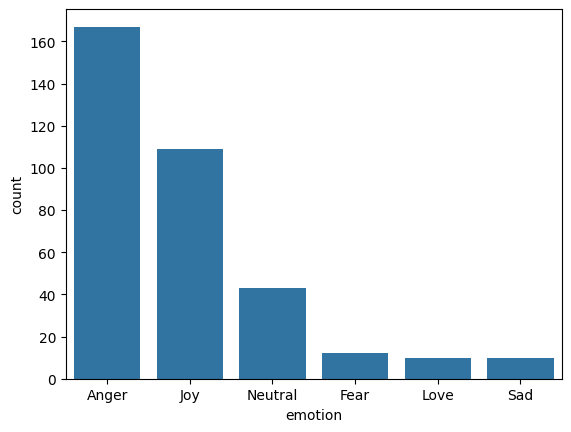

In [22]:
sns.barplot(x='emotion', y='count', data=count_emotion)


In [23]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='emotion', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,full_text,topic,context,username,emotion
329,Sejarah yang bisa dibanggakan itu kalo pemain ...,3,Anang sering disebut dalam konteks menyanyikan...,0852_3195,Sad
204,@realmadridindo1 Kasian yaa update statistikny...,3,Anang sering disebut dalam konteks menyanyikan...,akunbotok,Sad
263,@nocontextpersib Persib ga suka timnas kali ya...,3,Anang sering disebut dalam konteks menyanyikan...,IvanMustopa21,Sad
294,@rihanurduni @MAYT_Media Lagian ngapa mau jg n...,3,Anang sering disebut dalam konteks menyanyikan...,sidiq90s,Sad
211,Knp vibe menangnya persib lebih lebih dr timna...,3,Anang sering disebut dalam konteks menyanyikan...,dheshooo,Sad
356,Kalo mau ke Milan brarti udh putus asa masuk t...,3,Anang sering disebut dalam konteks menyanyikan...,FredArizona,Sad
341,@dwinucleo alasan gasuka timnas ya gini. apa s...,3,Anang sering disebut dalam konteks menyanyikan...,dahlaheriaja,Sad
191,ajggg gara2 timnas main smlm kirain udh hari j...,3,Anang sering disebut dalam konteks menyanyikan...,seuppie,Sad
474,@idextratime @bliblidotcom Dulu pencapaian ter...,3,Anang sering disebut dalam konteks menyanyikan...,Teguran3,Sad
455,gue jadi kepikiran sama orang ini gegara dia b...,3,Anang sering disebut dalam konteks menyanyikan...,cipanyanana,Sad


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]